# Program 4

In [11]:
import time
import random
import heapq
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

## Heapify Benchmark

Best Case -> When the input is already a valid heap, so no elements need to be moved. This would be a sorted list.

Worst Case -> When the input array needs max amount of rearrangement to become a heap. This would be a reverse sorted list. 

In [12]:
def generate_best_case_input(n):
    """
    Returns a sorted list with n elements
    """
    elements = []
    for i in range(n):
        elements.append(i)
    elements = generate_random_case_input(n)
    heapq.heapify(elements)
    return elements

In [13]:
def generate_worst_case_input(n):
    """
    Returns a reverse sorted list with n elements
    """
    elements = []
    for i in range(n, -1, -1):
        elements.append(i)
    return elements

In [14]:
def generate_random_case_input(n):
    """
    Generates a random list of n elements
    """
    elements = []
    for i in range(n):
        rand_value = random.randint(0,100)
        elements.append(rand_value)
    return elements

In [15]:
def benchmark_heapify(elements):
    """
    Returns the runtime of the heapify algorithm for the elements passed in
    """
    start = time.perf_counter()
    heapq.heapify(elements)
    end = time.perf_counter()
    return end - start

In [16]:
def calculate_run_times_heapify(num_elements, type):
    """
    Returns a list of run times for every element passed in the num_elements list
    Type: best / worst / random case
    """

    generate_input = generate_best_case_input
    if type == "worst":
        generate_input = generate_worst_case_input
    if type == "random":
        generate_input = generate_random_case_input


    run_times = []
    for n in num_elements:
        input = generate_input(n)
        run_times.append(benchmark_heapify(input))

    return run_times

In [17]:
elements_to_test = [10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000]
heapify_best_case = calculate_run_times_heapify(elements_to_test, "best")
heapify_worst_case = calculate_run_times_heapify(elements_to_test, "worst")
heapify_random_case = calculate_run_times_heapify(elements_to_test, "random")

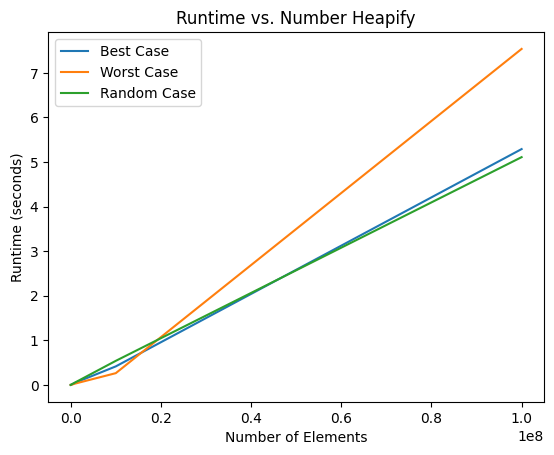

In [18]:
plt.plot(elements_to_test, heapify_best_case, label="Best Case")
plt.plot(elements_to_test, heapify_worst_case, label="Worst Case")
plt.plot(elements_to_test, heapify_random_case, label="Random Case")
plt.xlabel('Number of Elements')
plt.ylabel('Runtime (seconds)')
plt.title('Runtime vs. Number Heapify')
plt.legend()
plt.show()

In [21]:
def calculate_slope(list_sizes, run_times):
    """
    Takes in a list of elements as well as the run times associated with those elements
    and returns the slope using linregress
    """

    m, b, _, _, _ = linregress(np.log(list_sizes), np.log(run_times))
    return m

In [22]:
print(f'Best Case Slope: {calculate_slope(elements_to_test, heapify_best_case)}')
print(f'Random Case Slope: {calculate_slope(elements_to_test, heapify_random_case)}')
print(f'Worst Case Slope: {calculate_slope(elements_to_test, heapify_worst_case)}')

Best Case Slope: 0.9367320816512402
Random Case Slope: 0.9048749229597391
Worst Case Slope: 0.9441626515303999


## Heappush Benchmark

## Heappop Benchmark

## Heapreplace Benchmark